In [ ]:
#This is a project which focuses on image cleaning and processing after scanning
#The process generally entails
#1.Identifying and correcting the orientation of the page
#2.Cleaning the image
#3.Adding new border to the image

In [1]:
#Step1 Importing relevant libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

(<AxesSubplot:title={'center':'Original'}>,
 Text(0.5, 1.0, 'Original'))

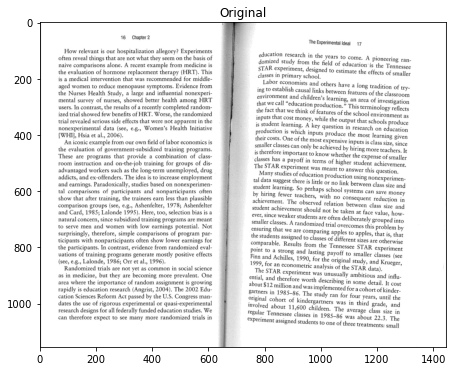

In [2]:
#Step1: Read image
img = cv2.imread("example2.png")
#Step2: See the image
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original")

In [3]:
#Step2: Apply Blur
#This step is important as it will remove speckles in subsequent steps
imgBlur = cv2.GaussianBlur(img, (5,5), 1)

(<AxesSubplot:title={'center':'Blur'}>,
 Text(0.5, 1.0, 'Blur'))

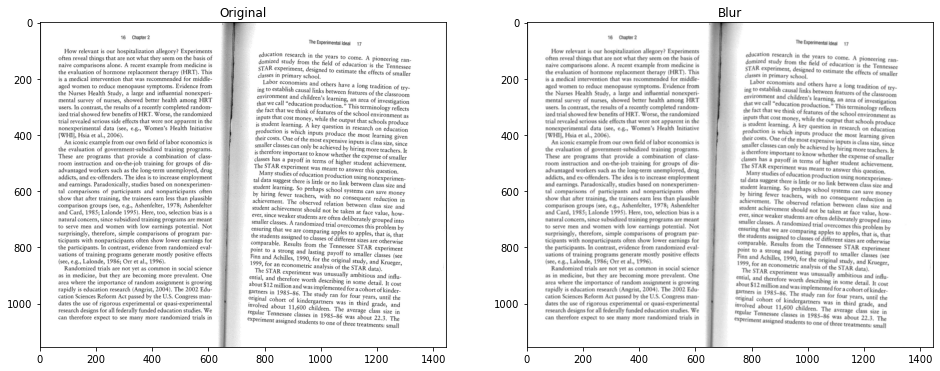

In [4]:
#See the images
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(imgBlur, cmap='gray'), plt.title("Blur")

In [5]:
#Step3: Canny edge detector
#This tool identifies the shape of the letters
Canny = cv2.Canny(imgBlur, 200, 200)

(<AxesSubplot:title={'center':'Original'}>,
 Text(0.5, 1.0, 'Original'))

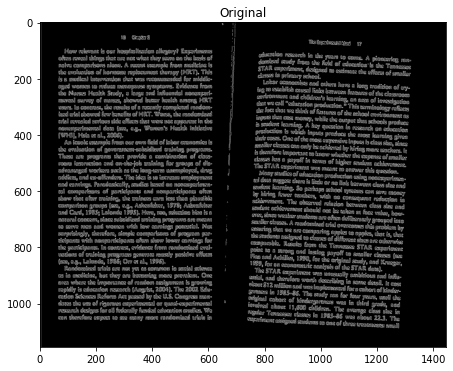

In [6]:
#See the image
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,2,1), plt.imshow(Canny, cmap='gray'), plt.title("Original")

In [7]:
#Step4: Apply Dilation
kernel1 = np.ones((2, 2))
kernel2 = np.ones((4, 4))
kernel3 = np.ones((5, 5))
kernel4 = np.ones((9, 9))

#Note the number of iterations below makes countours more simplified
#See the effect of changing these parameters.
imgDial1 = cv2.dilate(Canny, kernel1, iterations = 4)
imgDial2 = cv2.dilate(Canny, kernel2, iterations = 4)
imgDial3 = cv2.dilate(Canny, kernel3, iterations = 4)
imgDial4 = cv2.dilate(Canny, kernel4, iterations = 4)

(<AxesSubplot:title={'center':'imgDial4'}>,
 Text(0.5, 1.0, 'imgDial4'))

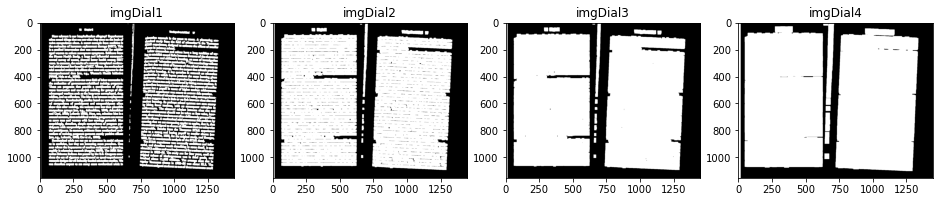

In [9]:
#See the images
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,4,1), plt.imshow(imgDial1, cmap='gray'), plt.title("imgDial1")
plt.subplot(1,4,2), plt.imshow(imgDial2, cmap='gray'), plt.title("imgDial2")
plt.subplot(1,4,3), plt.imshow(imgDial3, cmap='gray'), plt.title("imgDial3")
plt.subplot(1,4,4), plt.imshow(imgDial4, cmap='gray'), plt.title("imgDial4")

In [10]:
#Step5: Identifying page contours
contours, _ = cv2.findContours(imgDial4, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contourframe = img.copy()
contourframe = cv2.drawContours(contourframe, contours, -1, (255, 0, 255), 4)

In [11]:
#Step6: Sorting the contours
#The idea is to identify the largest two polygons which correspond to the two pages
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
#contours
biggest = contours[:2]
#biggest

In [12]:
#Step7: Creating shapes of the page - ConvexHulls 
#See explanation in Convex Hulls
#https://en.wikipedia.org/wiki/Convex_hull
convexHull1 = cv2.convexHull(biggest[0])
convexHull2 = cv2.convexHull(biggest[1])

In [13]:
#Step8: Drawing contours of the shapes of pages
img = cv2.imread("example2.png")
img_copy1 = img.copy()
img_copy2 = img.copy()
x1 = cv2.drawContours(img_copy1, [convexHull1], -1, (255, 0, 0), 2)
x2 = cv2.drawContours(img_copy2, [convexHull2], -1, (255, 0, 0), 2)

(<AxesSubplot:title={'center':'convexHull2'}>,
 Text(0.5, 1.0, 'convexHull2'))

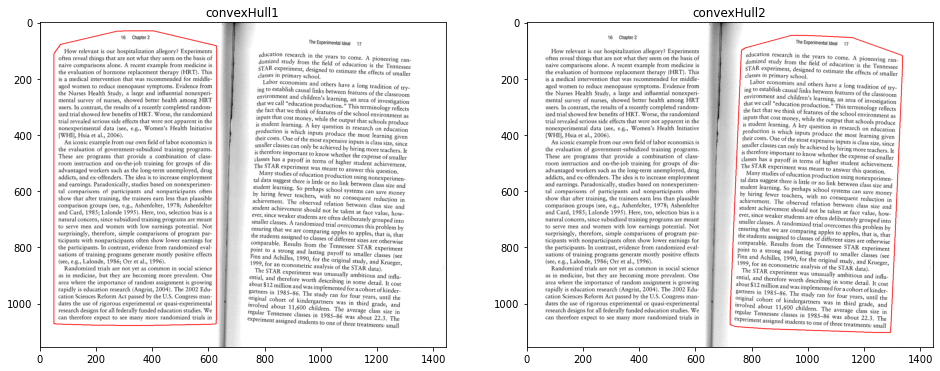

In [14]:
#See the image
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,2,1), plt.imshow(x1, cmap='gray'), plt.title("convexHull1")
plt.subplot(1,2,2), plt.imshow(x2, cmap='gray'), plt.title("convexHull2")

In [15]:
#Step9: Creating rectangles around the convexhull
Box2D_1 = cv2.minAreaRect(convexHull1)
Box2D_2 = cv2.minAreaRect(convexHull2)

In [16]:
#Step10: Taking the points around the rectangle
points_1 = cv2.boxPoints(Box2D_1)
points_2 = cv2.boxPoints(Box2D_2)
box_1 = np.int0(points_1)
box_2 = np.int0(points_2)

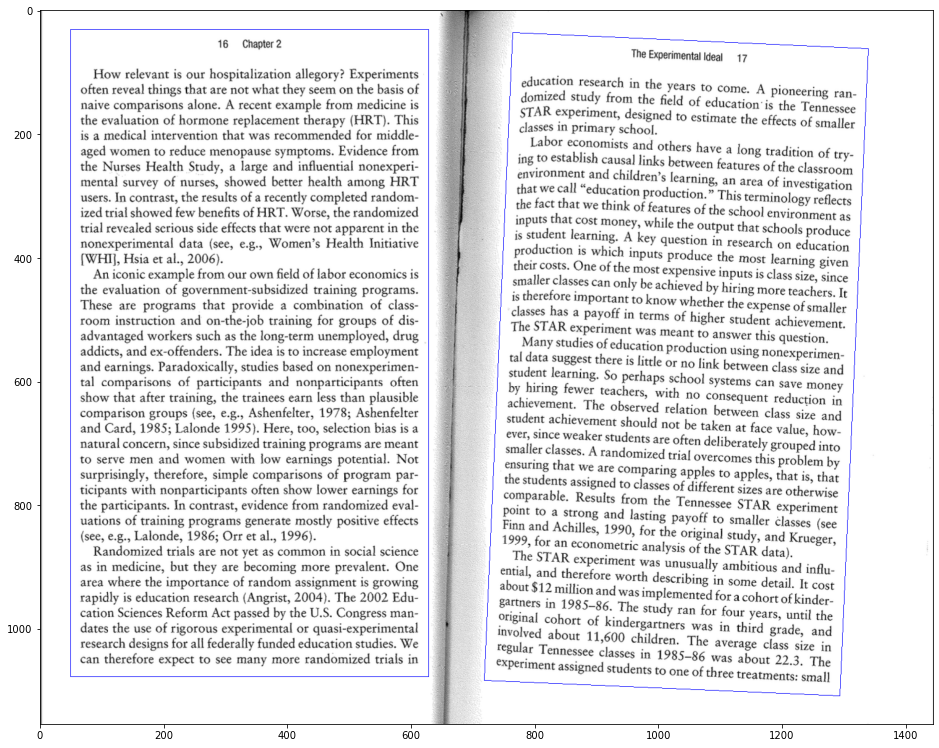

In [17]:
#Step11: Drawing the rectangle
img_copy3 = img.copy()
cv2.drawContours(img_copy3, [box_1], 0, (0, 0, 255), 1)
cv2.drawContours(img_copy3, [box_2], 0, (0, 0, 255), 1)
ima = plt.imshow(img_copy3)
plt.show()

In [18]:
#Step11: Dealing with rotation of page
img_copy3 = img.copy()
height, width = img_copy3.shape[:2]
center = (width/2, height/2)

#Determine the angle. Convert it to the value that was originally used to obtain skewed image
angle = Box2D_2[-1]
if angle < -45:
    angle = 90 + angle
else:
    angle = 1.0 * angle

In [19]:
angle

2.5201947689056396

In [20]:
#Step12: Get rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)
img_rot = cv2.warpAffine(img_copy3,rotate_matrix,(width, height))

(<AxesSubplot:title={'center':'img_rot - page 2'}>,
 Text(0.5, 1.0, 'img_rot - page 2'))

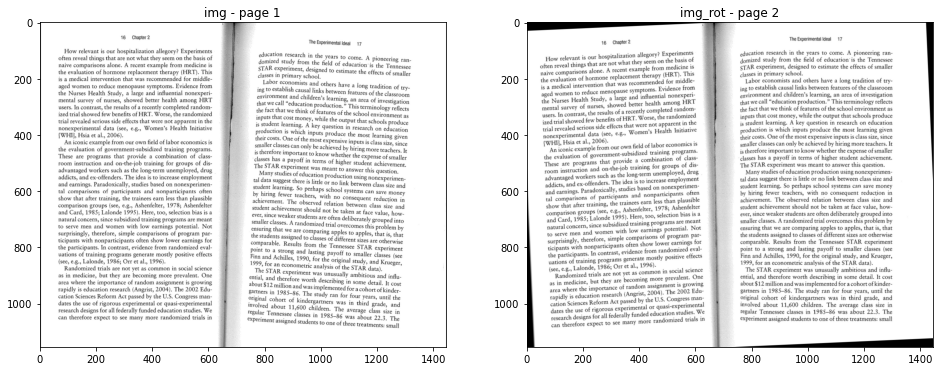

In [21]:
#See the images
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,2,1), plt.imshow(img_copy3, cmap='gray'), plt.title("img - page 1")
plt.subplot(1,2,2), plt.imshow(img_rot, cmap='gray'), plt.title("img_rot - page 2")

In [22]:
#Step13: Cropping the first image
x1, y1, w1, h1 = cv2.boundingRect(box_1)
img_copy3 = img.copy()
img_copy3 = img_copy3[y1:y1+h1,x1:x1+w1]

(<AxesSubplot:title={'center':'img_copy3'}>,
 Text(0.5, 1.0, 'img_copy3'))

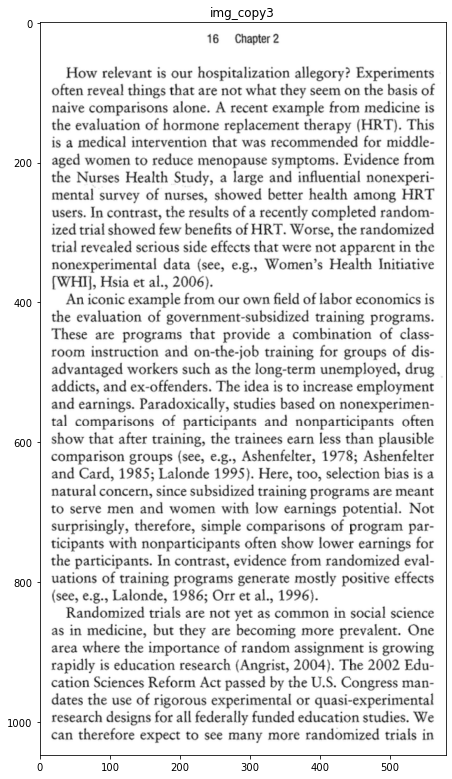

In [24]:
#See the image
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,2,1), plt.imshow(img_copy3, cmap='gray'), plt.title("img_copy3")

In [51]:
#Function to identify page orintation
def correct_orient(pic):
    #Input: 
    #A picture with text over two pages
    #Output:
    #Two pictures showing their correct rotations
    #Step0: Make a copy
    pic_copy = pic.copy()
    #Step1: Applying blur
    imgBlur = cv2.GaussianBlur(pic_copy, (5,5), 1)
    print("Step1: Applied Gaussing Blur")
    #Step2: Shape of letter
    Canny = cv2.Canny(imgBlur, 200, 200)
    print("Step2: Canny")
    #Step3: Apply Dilation
    kernel4 = np.ones((9, 9))
    imgDial4 = cv2.dilate(Canny, kernel4, iterations = 4)
    print("Step3: Applied dilaton")
    #Step4: Identifying page contour
    contours, _ = cv2.findContours(imgDial4, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #Step5: Sorting the contours
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    biggest = contours[:2]
    print("Step5: Identified contours for both pages")
    #Step6: Creating shapes of the page - ConvexHulls 
    convexHull1 = cv2.convexHull(biggest[0])
    convexHull2 = cv2.convexHull(biggest[1])
    print("Step6: Created Convex Hulls")
    #Step7: Creating rectangles around the convexhull
    Box2D_1 = cv2.minAreaRect(convexHull1)
    Box2D_2 = cv2.minAreaRect(convexHull2)
    print("Step7: Made rectangles around the Convex Hull")
    #Step8: Taking the points around the rectangle
    points_1 = cv2.boxPoints(Box2D_1)
    points_2 = cv2.boxPoints(Box2D_2)
    box_1 = np.int0(points_1)
    box_2 = np.int0(points_2)
    print("Step8: Taking the points around the rectangle")
    #Step9: Identify Angle page
    height, width = pic_copy.shape[:2]
    center = (width/2, height/2)
    #Step10: Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle1 = Box2D_1[-1]
    if angle1 < -45:
        angle1 = 90 + angle1
    else:
        angle1 = 0
    angle2 = Box2D_2[-1]
    #print(angle2)
    if angle2 < -45:
        angle2 = 90 + angle2
    else:
        angle2 = 1.0 * angle2
    print("Step10: Identified angle")
    #Step11: Get rotation matrix
    rotate_matrix1 = cv2.getRotationMatrix2D(center=center, angle=angle1, scale=1)
    img_rot1 = cv2.warpAffine(pic_copy,rotate_matrix1,(width, height))
    rotate_matrix2 = cv2.getRotationMatrix2D(center=center, angle=angle2, scale=1)
    img_rot2= cv2.warpAffine(pic_copy,rotate_matrix2,(width, height))
    print("Step11: Obtained rotation matrix")
    return img_rot1, img_rot2

Step1: Applied Gaussing Blur
Step2: Canny
Step3: Applied dilaton
Step5: Identified contours for both pages
Step6: Created Conves Hulls
Step7: Made rectangles around the Convex Hull
Step8: Made rectangles around the Convex Hull
Step10: Identified angle
Step11: Obtained rotation matrix


(<AxesSubplot:title={'center':'img - page 2'}>,
 Text(0.5, 1.0, 'img - page 2'))

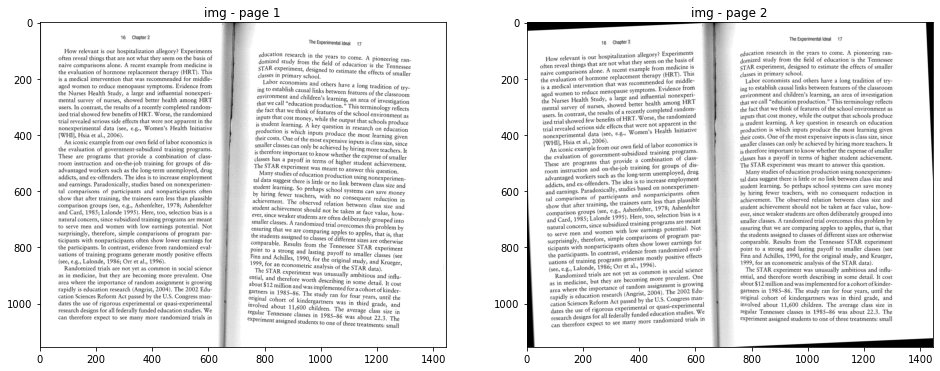

In [52]:
x=correct_orient(img)
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,2,1), plt.imshow(x[0], cmap='gray'), plt.title("img - page 1")
plt.subplot(1,2,2), plt.imshow(x[1], cmap='gray'), plt.title("img - page 2")

In [53]:
#Define function to process the first page
def process_first_page(rotated_pic1):
    #Input: A rotated pic which identifies the correct rotation
    #Step0: Make a copy
    pic_copy = rotated_pic1.copy()
    #Step1: Applying blur
    imgBlur = cv2.GaussianBlur(pic_copy, (5,5), 1)
    print("Step1: Applied Gaussing Blur")
    #Step2: Shape of letter
    Canny = cv2.Canny(imgBlur, 200, 200)
    print("Step2: Canny")
    #Step3: Apply Dilation
    kernel4 = np.ones((9, 9))
    imgDial4 = cv2.dilate(Canny, kernel4, iterations = 4)
    print("Step3: Applied dilaton")
    #Step4: Identifying page contour
    contours, _ = cv2.findContours(imgDial4, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #contourframe = cv2.drawContours(contourframe, contours, -1, (255, 0, 255), 4)
    #Step5: Sorting the contours
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    biggest = contours[:2]
    print("Step5: Identified contours for both pages")
    #Step6: Creating shapes of the page - ConvexHulls 
    convexHull1 = cv2.convexHull(biggest[0])
    convexHull2 = cv2.convexHull(biggest[1])
    print("Step6: Created Convex Hulls")
    #Step7: Creating rectangles around the convexhull
    Box2D_1 = cv2.minAreaRect(convexHull1)
    Box2D_2 = cv2.minAreaRect(convexHull2)
    print("Step7: Made rectangles around the Convex Hull")
    #Step8: Taking the points around the rectangle
    points_1 = cv2.boxPoints(Box2D_1)
    points_2 = cv2.boxPoints(Box2D_2)
    box_1 = np.int0(points_1)
    box_2 = np.int0(points_2)
    print("Step8: Taking the points around the rectangle")
    #Step9: Cropping the first image
    x1, y1, w1, h1 = cv2.boundingRect(box_1)
    processes_img1 = pic_copy[y1:y1+h1,x1:x1+w1]
    print("Step9: Cropped image")
    #Step10: Applying borders
    top_size = int(0.05 * processes_img1.shape[0])  # shape[0] = rows
    left_size = int(0.05 * processes_img1.shape[1])  # shape[1] = cols
    mean=255
    dst = cv2.copyMakeBorder(processes_img1, top=top_size, bottom=top_size, 
                         left=left_size, right=left_size, 
                         borderType=cv2.BORDER_CONSTANT, 
                         value=[mean, mean, mean])
    print("Step10: Applied border")
    return dst

Step1: Applied Gaussing Blur
Step2: Canny
Step3: Applied dilaton
Step5: Identified contours for both pages
Step6: Created Convex Hulls
Step7: Made rectangles around the Convex Hull
Step8: Taking the points around the rectangle
Step9: Cropped image
Step10: Applied border


(<AxesSubplot:title={'center':'img - page 1'}>,
 Text(0.5, 1.0, 'img - page 1'))

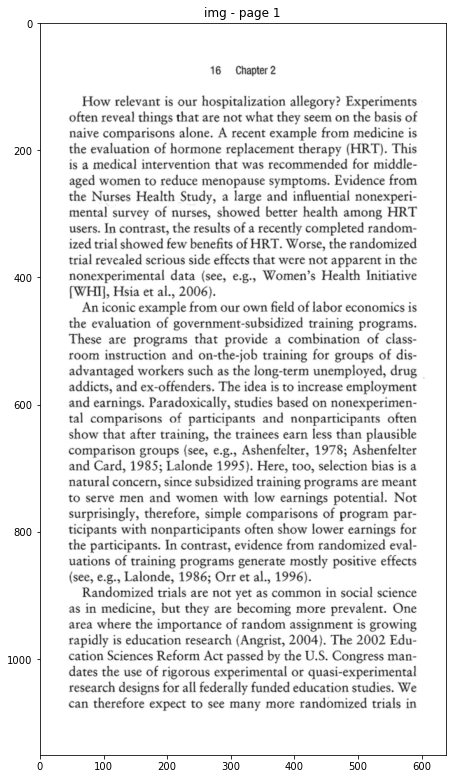

In [54]:
new1=process_first_page(x[0])
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,2,1), plt.imshow(new1, cmap='gray'), plt.title("img - page 1")

In [55]:
#Define function to process the second page
def process_second_page(roated_pic2):
    #Input: A rotated pic which identifies the correct rotation
    #Step0: Make a copy
    pic2_copy = roated_pic2.copy()
    #Step1: Applying blur
    imgBlur = cv2.GaussianBlur(pic2_copy, (5,5), 1)
    print("Step1: Applied Gaussing Blur")
    #Step2: Shape of letter
    Canny = cv2.Canny(imgBlur, 200, 200)
    print("Step2: Canny")
    #Step3: Apply Dilation
    kernel4 = np.ones((9, 9))
    imgDial4 = cv2.dilate(Canny, kernel4, iterations = 4)
    print("Step3: Applied dilaton")
    #Step4: Identifying page contour
    contours, _ = cv2.findContours(imgDial4, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #Step5: Sorting the contours

    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    biggest = contours[:2]
    print("Step5: Identified contours for both pages")
    #Step6: Creating shapes of the page - ConvexHulls 
    convexHull1 = cv2.convexHull(biggest[0])
    convexHull2 = cv2.convexHull(biggest[1])
    print("Step6: Created Convex Hulls")
    #Step7: Creating rectangles around the convexhull
    Box2D_1 = cv2.minAreaRect(convexHull1)
    Box2D_2 = cv2.minAreaRect(convexHull2)
    print("Step7: Made rectangles around the Convex Hull")
    points_1 = cv2.boxPoints(Box2D_1)
    points_2 = cv2.boxPoints(Box2D_2)
    box_1 = np.int0(points_1)
    box_2 = np.int0(points_2)
    print("Step8: Taking the points around the rectangle")
    #Step9: Cropping the first image
    x2, y2, w2, h2 = cv2.boundingRect(box_2)
    processed_img2 = pic2_copy[y2:y2+h2, x2:x2+w2]
    print("Step9: Cropped image")
    #Step10: Applying borders
    top_size = int(0.05 * processed_img2.shape[0])  # shape[0] = rows
    left_size = int(0.05 * processed_img2.shape[1])  # shape[1] = cols
    mean=255
    dst = cv2.copyMakeBorder(processed_img2, top=top_size, bottom=top_size, 
                         left=left_size, right=left_size, 
                         borderType=cv2.BORDER_CONSTANT, 
                         value=[mean, mean, mean])
    print("Step10: Applied border")
    return dst

Step1: Applied Gaussing Blur
Step2: Canny
Step3: Applied dilaton
Step5: Identified contours for both pages
Step6: Created Convex Hulls
Step7: Made rectangles around the Convex Hull
Step8: Taking the points around the rectangle
Step9: Cropped image
Step10: Applied border


(<AxesSubplot:title={'center':'img - page 1'}>,
 Text(0.5, 1.0, 'img - page 1'))

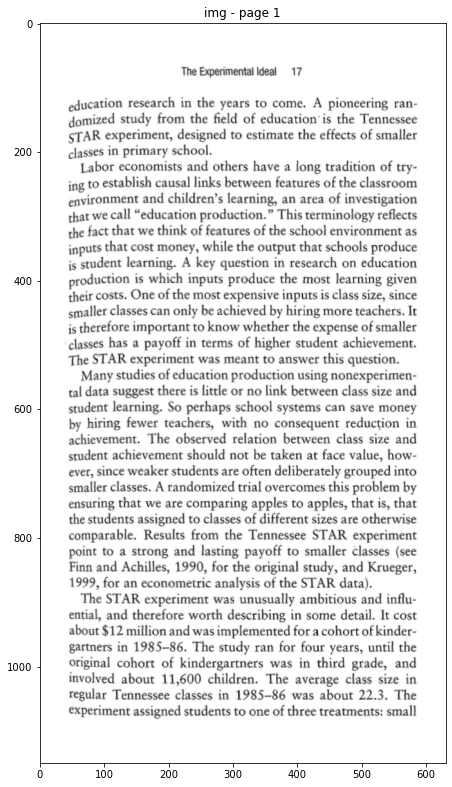

In [56]:
new2=process_second_page(x[1])
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,2,1), plt.imshow(new2, cmap='gray'), plt.title("img - page 1")

(<AxesSubplot:title={'center':'img - page 2'}>,
 Text(0.5, 1.0, 'img - page 2'))

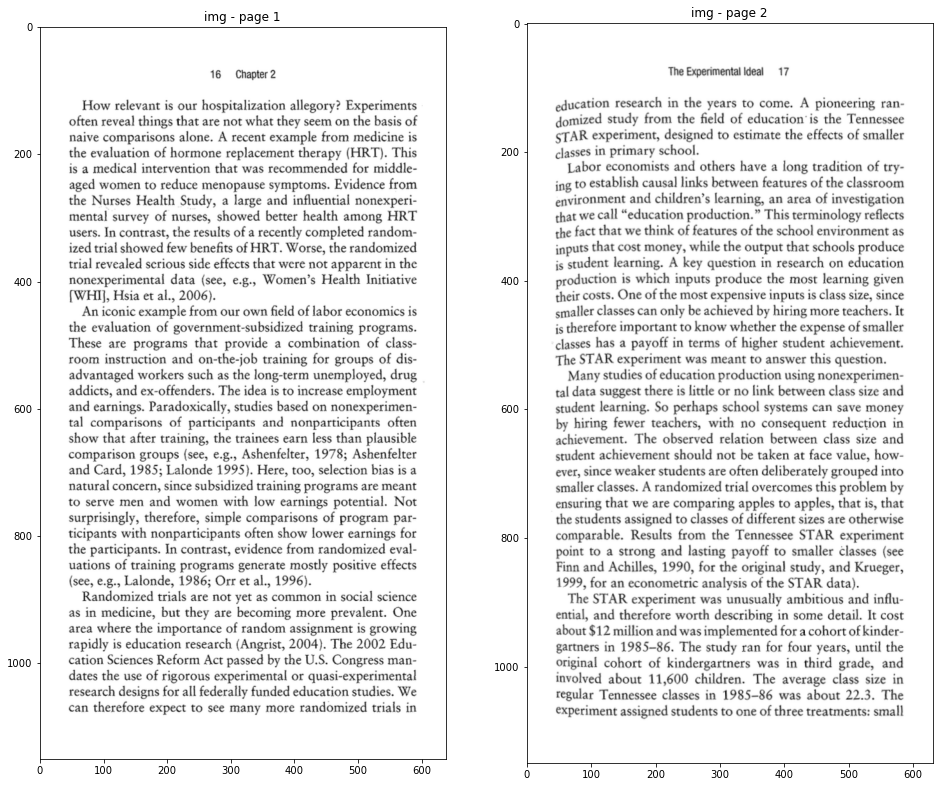

In [57]:
plt.rcParams["figure.figsize"] = (16, 16)
plt.subplot(1,2,1), plt.imshow(new1, cmap='gray'), plt.title("img - page 1")
plt.subplot(1,2,2), plt.imshow(new2, cmap='gray'), plt.title("img - page 2")

In [48]:
#Saving images
im = Image.fromarray(new1)
im.save("new1.jpeg")

im = Image.fromarray(new2)
im.save("new2.jpeg")